<a href="https://colab.research.google.com/github/isparkyou-github/myPapers/blob/main/Solar_Power_Forecasting_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load required libraries
install.packages("randomForest")
install.packages("keras3")
install.packages("xgboost")
install.packages("ggplot2")
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(keras3)
library(xgboost)
library(randomForest)
library(ggplot2)
library(corrplot)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


corrplot 0.94 loaded



In [ ]:
# Load and summarize the dataset
cat("Loading datasets...\n")
dataset_files <- c("/content/dataset_files/station00.csv")  # Add other files if needed

Loading datasets...


In [ ]:
# Initialize empty list to store datasets
datasets <- list()

In [ ]:
# Loop through each dataset file and load into a list
for (file in dataset_files) {
  dataset <- read.csv(file)  # Load each dataset
  datasets[[file]] <- dataset  # Store in the list
  cat("Loaded dataset: ", file, "\n")
}

Loaded dataset:  /content/dataset_files/station00.csv 


In [ ]:
# Combine all datasets into one large dataset
combined_dataset <- do.call(rbind, datasets)
cat("Combined dataset dimensions: ", dim(combined_dataset), "\n")

Combined dataset dimensions:  28896 15 


In [ ]:
# Show dataset names and first few rows
cat("Column names of dataset:\n")
print(names(combined_dataset))
cat("First few rows of the dataset:\n")
print(head(combined_dataset, 5))

Column names of dataset:
 [1] "date_time"         "nwp_globalirrad"   "nwp_directirrad"  
 [4] "nwp_temperature"   "nwp_humidity"      "nwp_windspeed"    
 [7] "nwp_winddirection" "nwp_pressure"      "lmd_totalirrad"   
[10] "lmd_diffuseirrad"  "lmd_temperature"   "lmd_pressure"     
[13] "lmd_winddirection" "lmd_windspeed"     "power"            
First few rows of the dataset:
                                                 date_time nwp_globalirrad
/content/dataset_files/station00.csv.1 2018-08-15 16:00:00               0
/content/dataset_files/station00.csv.2 2018-08-15 16:15:00               0
/content/dataset_files/station00.csv.3 2018-08-15 16:30:00               0
/content/dataset_files/station00.csv.4 2018-08-15 16:45:00               0
/content/dataset_files/station00.csv.5 2018-08-15 17:00:00               0
                                       nwp_directirrad nwp_temperature
/content/dataset_files/station00.csv.1               0           22.78
/content/dataset_files/stat

In [ ]:
# Summary and structure of dataset
cat("Summary of combined dataset:\n")
print(summary(combined_dataset))
cat("Structure of combined dataset:\n")
print(str(combined_dataset))

Summary of combined dataset:
  date_time         nwp_globalirrad nwp_directirrad nwp_temperature 
 Length:28896       Min.   :  0.0   Min.   :  0.0   Min.   :-14.01  
 Class :character   1st Qu.:  0.0   1st Qu.:  0.0   1st Qu.:  2.29  
 Mode  :character   Median :  0.0   Median :  0.0   Median : 10.51  
                    Mean   :168.4   Mean   :147.8   Mean   : 11.06  
                    3rd Qu.:305.5   3rd Qu.:259.2   3rd Qu.: 19.58  
                    Max.   :942.8   Max.   :885.6   Max.   : 41.09  
  nwp_humidity    nwp_windspeed    nwp_winddirection  nwp_pressure   
 Min.   :  5.07   Min.   : 0.050   Min.   :  0.03    Min.   : 987.8  
 1st Qu.: 23.33   1st Qu.: 2.070   1st Qu.: 89.50    1st Qu.:1007.6  
 Median : 35.05   Median : 3.140   Median :186.89    Median :1015.4  
 Mean   : 40.83   Mean   : 3.539   Mean   :184.02    Mean   :1014.8  
 3rd Qu.: 54.46   3rd Qu.: 4.510   3rd Qu.:280.99    3rd Qu.:1021.1  
 Max.   :100.00   Max.   :15.980   Max.   :360.00    Max.   :1040.8 

In [ ]:
# Checking for missing values
cat("Checking for missing values...\n")
missing_values <- sum(is.na(combined_dataset))
cat("Total missing values in dataset: ", missing_values, "\n")

Checking for missing values...
Total missing values in dataset:  0 


In [ ]:
# ---------- Data Visualization using par() and corrplot() ----------
cat("Visualizing dataset distributions...\n")

Visualizing dataset distributions...


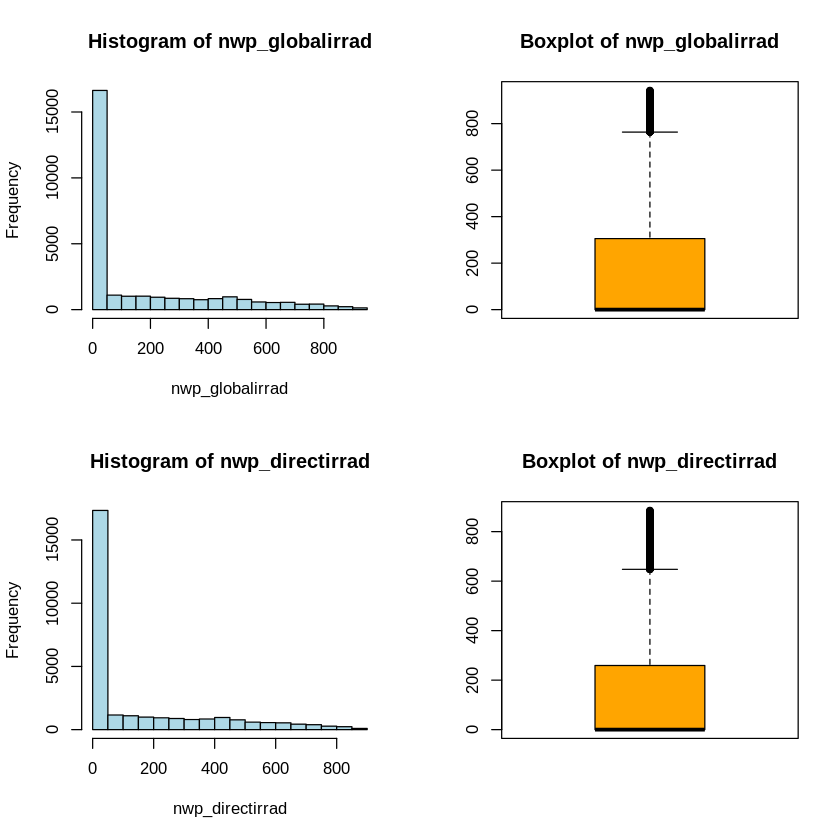

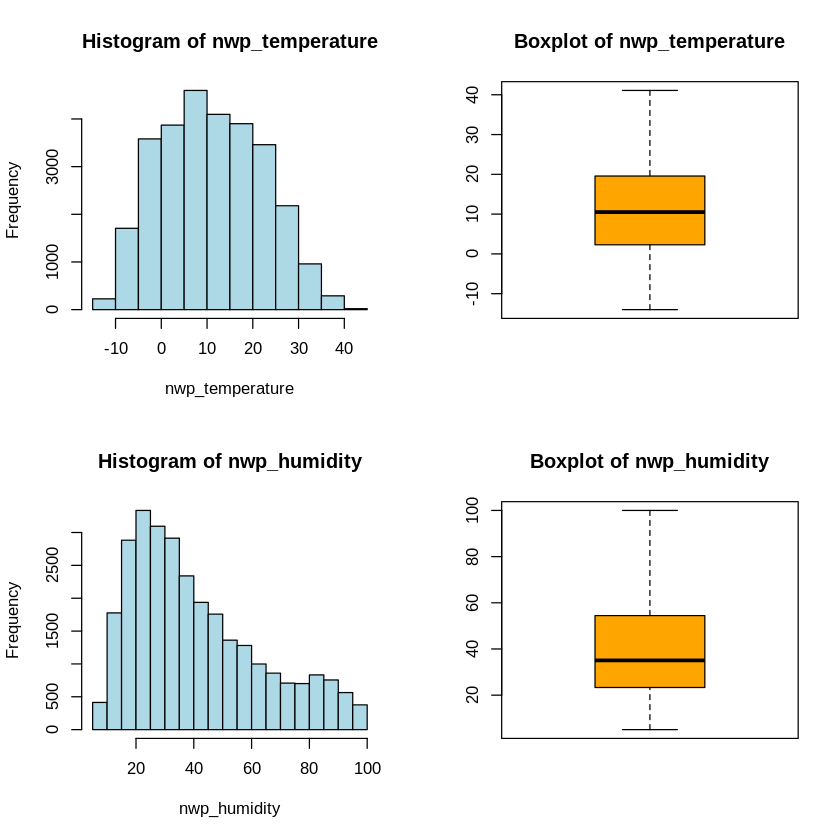

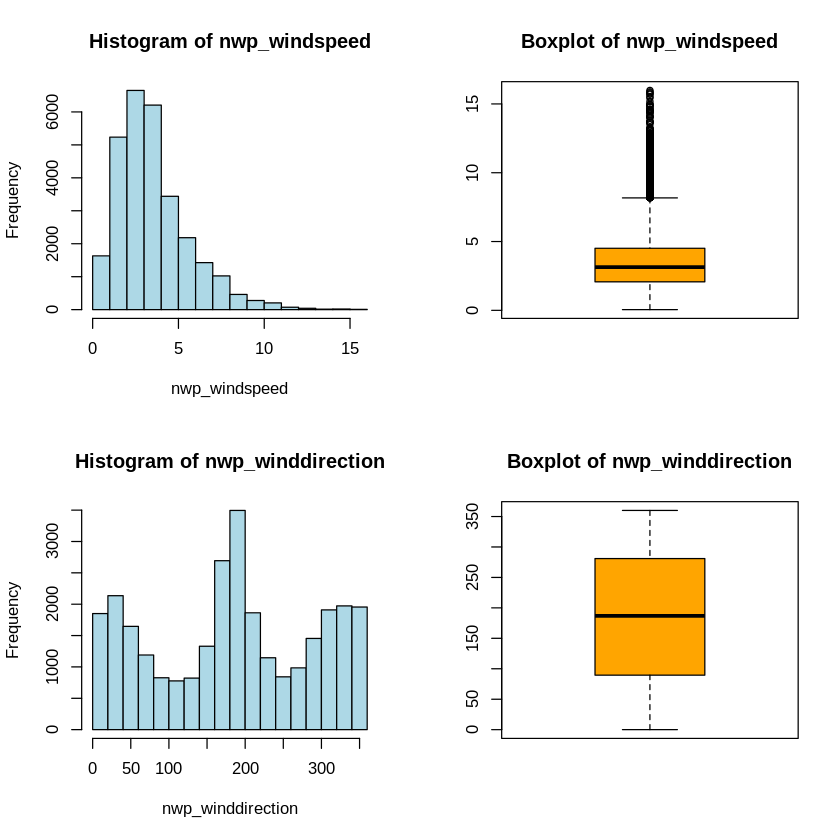

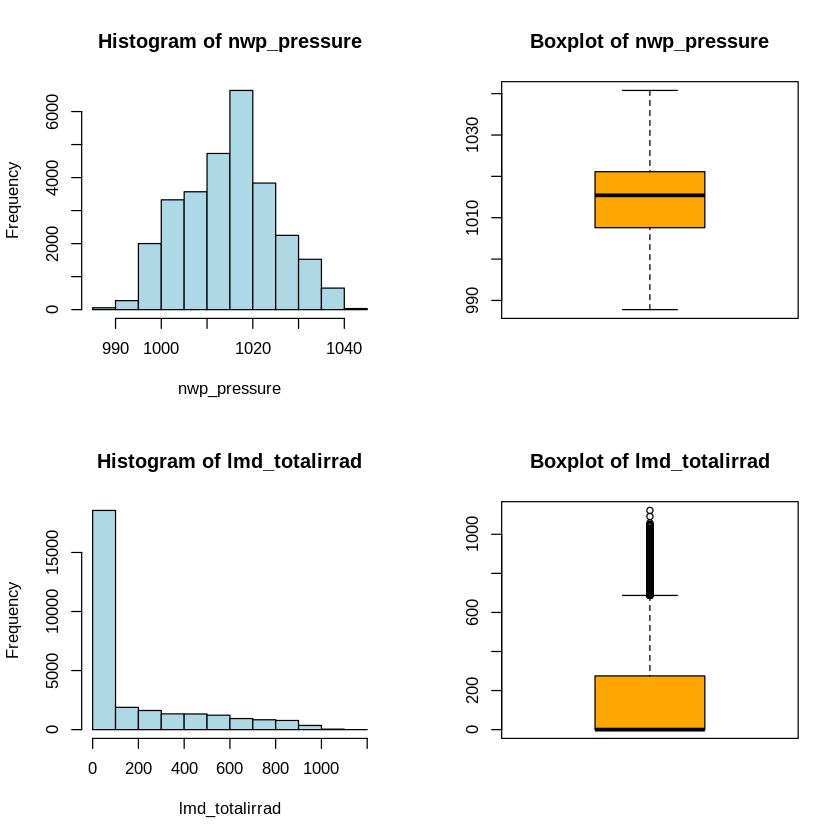

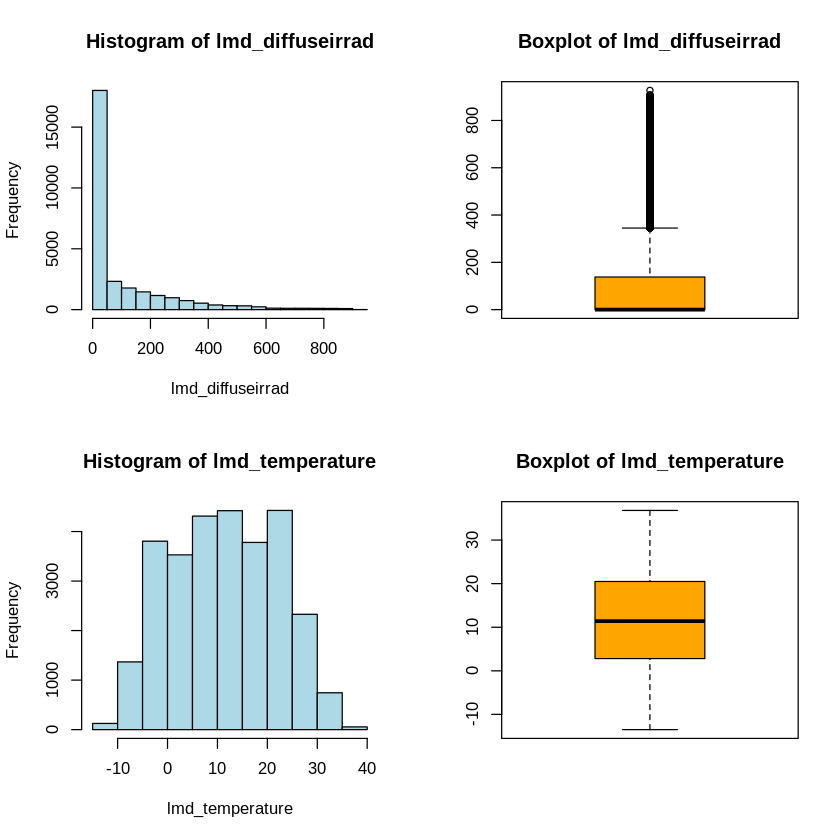

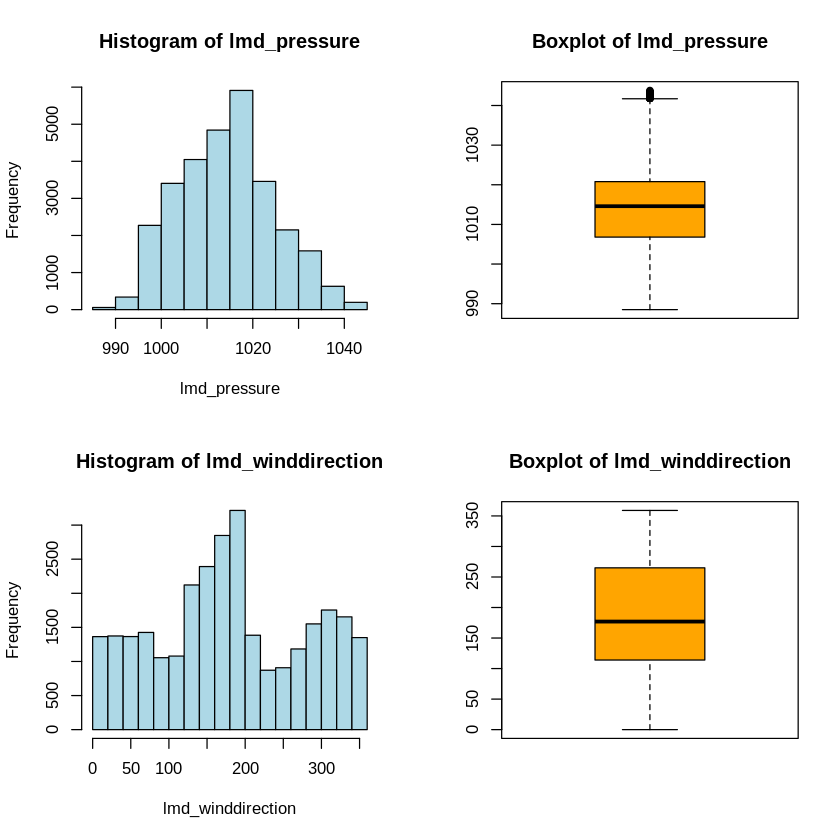

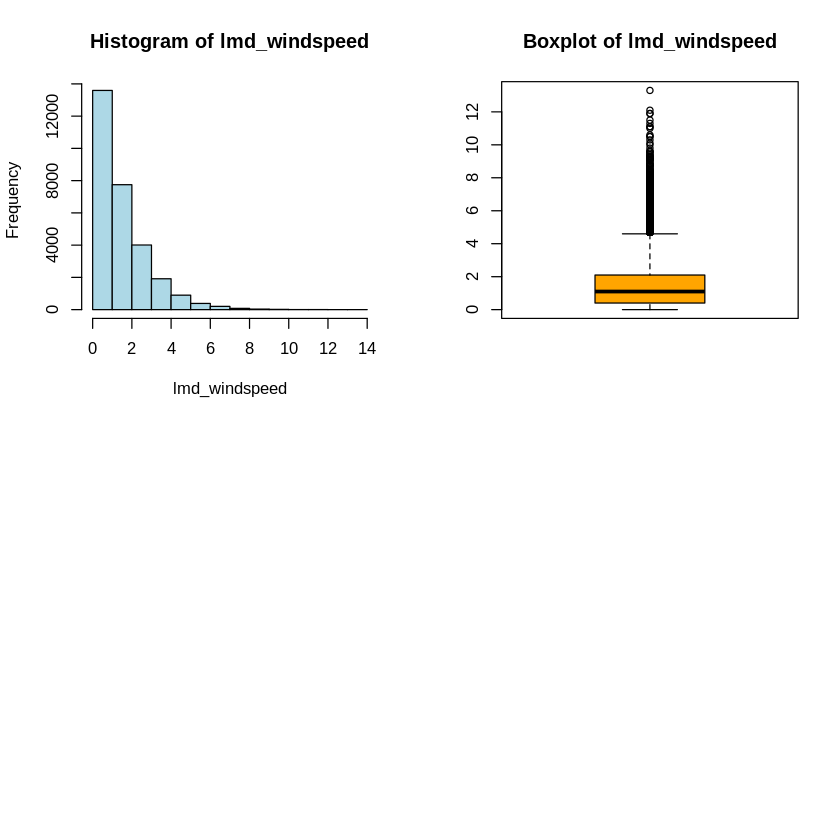

In [ ]:
# Using par() to create multiple plots in one graphic
par(mfrow=c(2, 2))  # 2 rows, 2 columns of plots
for (i in 9:14) {
  column_name <- names(combined_dataset)[i]
  hist(combined_dataset[[i]], main = paste("Histogram of", column_name), xlab = column_name, col = "lightblue")
  boxplot(combined_dataset[[i]], main = paste("Boxplot of", column_name), col = "orange")
}

Creating correlation plot...


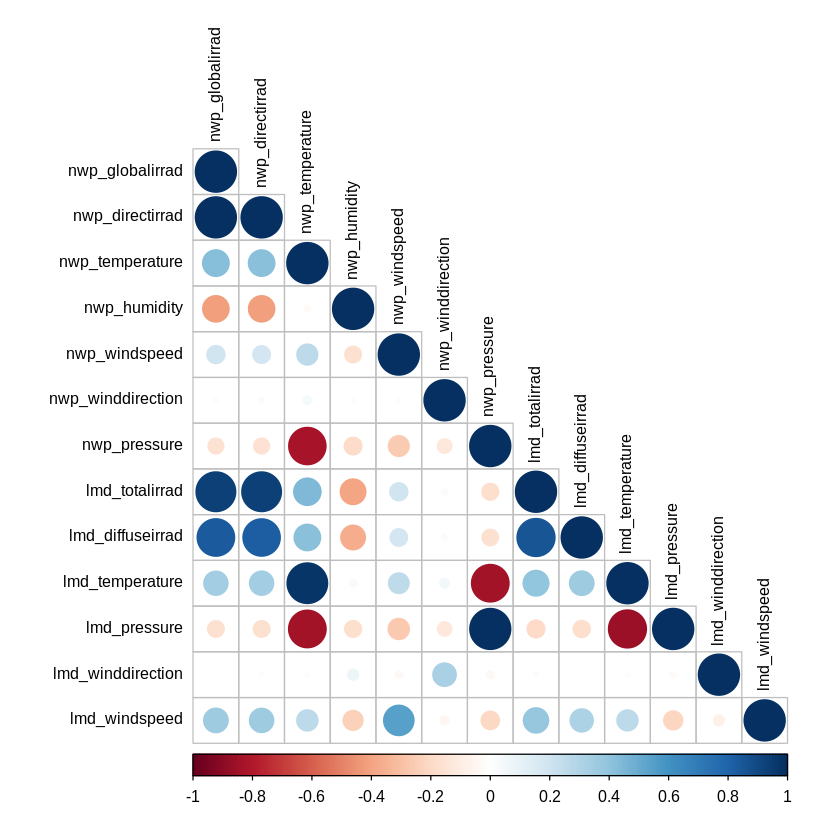

In [ ]:
# Correlation plot for the dataset (for the selected columns 9 to 14)
cat("Creating correlation plot...\n")
cor_matrix <- cor(combined_dataset[, 9:15])
corrplot(cor_matrix, method = "circle", type = "lower", tl.col = "black", tl.cex = 0.8)

In [ ]:
# Subset the data to only use 300 samples
set.seed(42)
sampled_idx <- sample(1:nrow(combined_dataset), 300)
sampled_data <- combined_dataset[sampled_idx, ]

In [ ]:
# Select columns 9 to 14 as features and column 15 as the target variable
if (ncol(combined_dataset) < 15) stop("Not enough columns in the dataset.")
X <- combined_dataset[, 9:14]  # Columns 9 to 14 as features
y <- combined_dataset[, 15]  # Column 15 as the target

In [ ]:
# Split into 80% training and 20% testing
set.seed(42)
n <- nrow(X)
train_idx <- sample(1:n, size = 0.8 * n)
test_idx <- setdiff(1:n, train_idx)

X_train <- as.matrix(X[train_idx, ])
y_train <- y[train_idx]
X_test <- as.matrix(X[test_idx, ])
y_test <- y[test_idx]

cat("Training and test data split completed. Training rows: ", nrow(X_train), " Testing rows: ", nrow(X_test), "\n")

Training and test data split completed. Training rows:  23116  Testing rows:  5780 


In [ ]:
# ---------- Train LSTM Model ----------
cat("Training LSTM model...\n")
X_train_lstm <- array(X_train, dim = c(nrow(X_train), ncol(X_train), 1))
X_test_lstm <- array(X_test, dim = c(nrow(X_test), ncol(X_test), 1))

lstm_model <- keras_model_sequential() %>%
  layer_lstm(units = 10, input_shape = list(ncol(X_train), 1), return_sequences = FALSE) %>%
  layer_dense(units = 1)

lstm_model %>% compile(
  optimizer = 'adam',
  loss = 'mse'
)

lstm_model %>% fit(
  X_train_lstm, y_train, epochs = 10, batch_size = 30, verbose = 1
)

lstm_train_pred <- lstm_model %>% predict(X_train_lstm)
lstm_test_pred <- lstm_model %>% predict(X_test_lstm)

Training LSTM model...


In [ ]:
# ---------- Train XGBoost Model ----------
cat("Training XGBoost model...\n")
dtrain <- xgb.DMatrix(data = X_train, label = y_train)
dtest <- xgb.DMatrix(data = X_test)

xgb_params <- list(
  objective = "reg:squarederror",
  eta = 0.1,
  max_depth = 3
)

xgb_model <- xgb.train(params = xgb_params, data = dtrain, nrounds = 50)

xgb_train_pred <- predict(xgb_model, X_train)
xgb_test_pred <- predict(xgb_model, X_test)

Training XGBoost model...


In [ ]:
# ---------- Train Random Forest Model ----------
cat("Training Random Forest model...\n")
rf_model <- randomForest(X_train, y_train, ntree = 100)

rf_train_pred <- predict(rf_model, X_train)
rf_test_pred <- predict(rf_model, X_test)

Training Random Forest model...


In [ ]:
# ---------- Stacking (Meta Learner) ----------
cat("Training meta-learner (linear regression)...\n")
stack_train <- data.frame(
  lstm = lstm_train_pred,
  xgb = xgb_train_pred,
  rf = rf_train_pred
)

stack_test <- data.frame(
  lstm = lstm_test_pred,
  xgb = xgb_test_pred,
  rf = rf_test_pred
)

meta_model <- lm(y_train ~ ., data = stack_train)

final_train_pred <- predict(meta_model, stack_train)
final_test_pred <- predict(meta_model, stack_test)

Training meta-learner (linear regression)...


In [ ]:
# ---------- Model Evaluation ----------
cat("Evaluating models using RMSE and R-squared...\n")
rmse <- function(actual, predicted) {
  sqrt(mean((actual - predicted)^2))
}

r_squared <- function(actual, predictions) {
  ss_res <- sum((actual - predictions)^2)  # Residual sum of squares
  ss_tot <- sum((actual - mean(actual))^2)  # Total sum of squares
  1 - (ss_res / ss_tot)
}

train_rmse <- rmse(y_train, final_train_pred)
test_rmse <- rmse(y_test, final_test_pred)

cat("Train RMSE: ", train_rmse, "\n")
cat("Test RMSE: ", test_rmse, "\n")

train_r_squared_value <- r_squared(y_train, final_train_pred)
test_r_squared_value <- r_squared(y_test, final_test_pred)

cat("Train R-squared: ", train_r_squared_value, "\n")
cat("Test R-squared: ", test_r_squared_value, "\n")

Evaluating models using RMSE and R-squared...
Train RMSE:  0.05272727 
Test RMSE:  0.1475873 
Train R-squared:  0.9983231 
Test R-squared:  0.9865005 


In [ ]:
# ---------- Condensed Summary of Linear Regression Model ----------
cat("Summary of the linear regression model:\n")

# Output model call
cat("Call:\n")
print(summary(meta_model)$call)

# Output key metrics of residuals (Min, 1Q, Median, 3Q, Max)
cat("Residuals (key statistics):\n")
residuals_summary <- summary(meta_model)$residuals
print(head(residuals_summary, 5))  # Show only the first 5 residual statistics

# Output significant coefficients with stars indicating significance
cat("Coefficients (significant predictors):\n")
coefficients <- summary(meta_model)$coefficients
print(coefficients[abs(coefficients[, "t value"]) > 2, ])  # Show only significant coefficients

# Output key model fit metrics: RSE, R-squared, F-statistic
cat("Model Fit Metrics:\n")
cat("Residual standard error (RSE): ", summary(meta_model)$sigma, "\n")
cat("Multiple R-squared: ", summary(meta_model)$r.squared, "\n")
cat("F-statistic: ", summary(meta_model)$fstatistic[1], "\n")

Summary of the linear regression model:
Call:
lm(formula = y_train ~ ., data = stack_train)
Residuals (key statistics):
/content/dataset_files/station00.csv.27185 
                               0.001555552 
/content/dataset_files/station00.csv.28645 
                               0.152380010 
/content/dataset_files/station00.csv.18753 
                              -0.009848704 
/content/dataset_files/station00.csv.21657 
                              -0.103271500 
 /content/dataset_files/station00.csv.9290 
                               0.002210861 
Coefficients (significant predictors):
        Estimate  Std. Error   t value     Pr(>|t|)
lstm -0.02866712 0.002224339 -12.88793 7.109742e-38
xgb  -0.29571011 0.003248952 -91.01707 0.000000e+00
rf    1.32158493 0.002326961 567.94450 0.000000e+00
Model Fit Metrics:
Residual standard error (RSE):  0.05273183 
Multiple R-squared:  0.9983231 
F-statistic:  4586451 


Visualizing RMSE comparison...


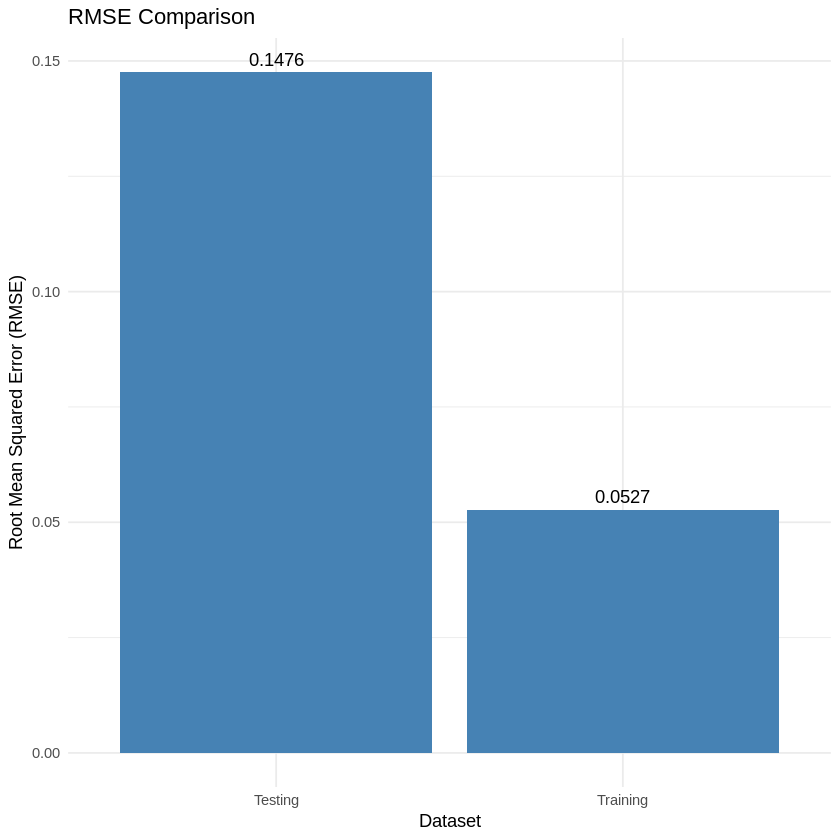

In [ ]:
# Visualizing RMSE comparison
cat("Visualizing RMSE comparison...\n")
rmse_data <- data.frame(
  dataset = c("Training", "Testing"),
  rmse_value = c(train_rmse, test_rmse)
)

ggplot(rmse_data, aes(x = dataset, y = rmse_value)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(rmse_value, 4)), vjust = -0.5) +
  labs(title = "RMSE Comparison", x = "Dataset", y = "Root Mean Squared Error (RMSE)") +
  theme_minimal()


Visualizing predicted vs actual for training and testing sets...


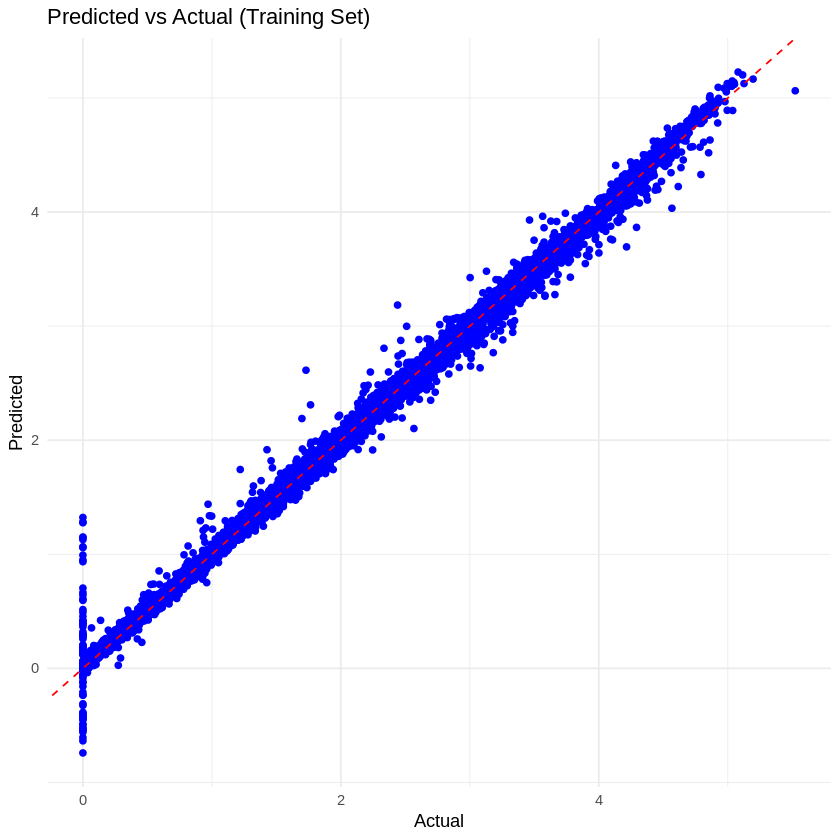

In [ ]:
# Visualizing predicted vs actual values for training set
cat("Visualizing predicted vs actual for training and testing sets...\n")
ggplot(data.frame(actual = y_train, predicted = final_train_pred), aes(x = actual, y = predicted)) +
  geom_point(color = "blue") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Predicted vs Actual (Training Set)", x = "Actual", y = "Predicted") +
  theme_minimal()

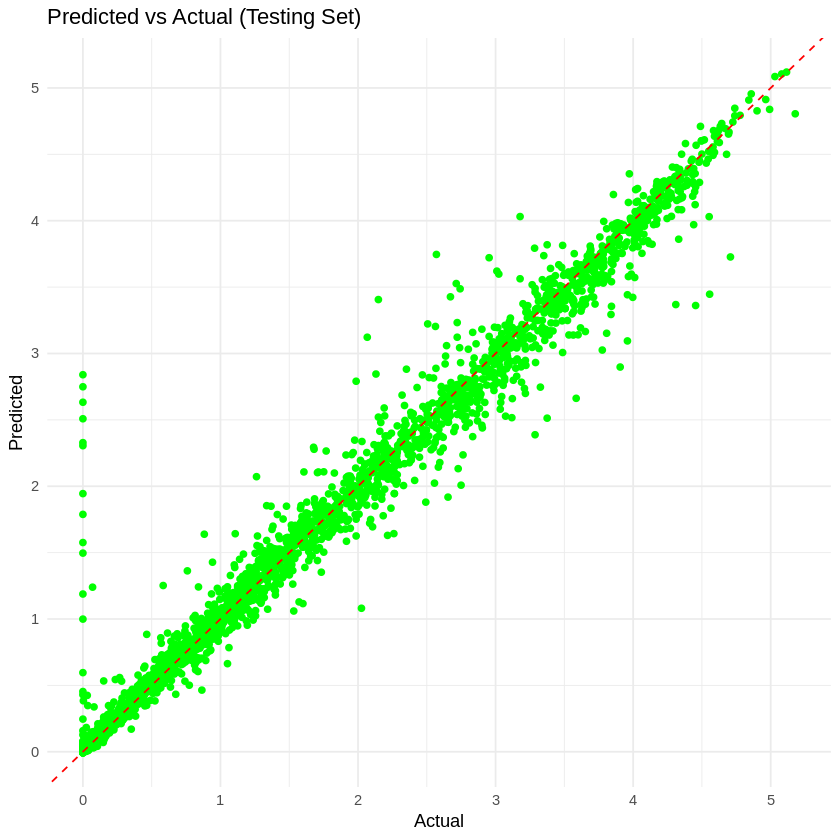

In [ ]:
# Visualizing predicted vs actual values for testing set
ggplot(data.frame(actual = y_test, predicted = final_test_pred), aes(x = actual, y = predicted)) +
  geom_point(color = "green") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(title = "Predicted vs Actual (Testing Set)", x = "Actual", y = "Predicted") +
  theme_minimal()